## Read and Clean Data

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv("immovlan_cleaned_file.csv")
df
df.columns

Index(['url', 'Property ID', 'Price', 'State of the property', 'Availability',
       'Number of bedrooms', 'Livable surface', 'Furnished', 'Attic', 'Garage',
       'Number of garages', 'Kitchen equipment', 'Kitchen type',
       'Number of bathrooms', 'Number of showers', 'Number of toilets',
       'Type of heating', 'Type of glazing', 'Elevator', 'Number of facades',
       'Garden', 'Surface garden', 'Terrace', 'Surface terrace',
       'Total land surface', 'Swimming pool', 'type', 'postal_code', 'city',
       'Region', 'province', 'price_per_sqm', 'Price_per_sqm_land'],
      dtype='object')

In [68]:
# drop less impactful columns 

df1 = df.drop(['Property ID','State of the property', 'Availability','Livable surface', 'Furnished', 'Attic','Number of garages','Kitchen equipment', 'Kitchen type','Number of showers','Type of heating', 'Type of glazing','Number of facades','Surface garden', 'Terrace', 'Surface terrace',
       'Total land surface','Price_per_sqm_land'], axis='columns')
df1

,url,Price,Number of bedrooms,Garage,Number of bathrooms,Number of toilets,Elevator,Garden,Swimming pool,type,postal_code,city,Region,province,price_per_sqm
0,https://immovlan.be/en/detail/studio/for-sale/...,175000.0,0.0,NaN,1.0,1.0,NaN,0.0,NaN,studio,4000,liege,Wallonia,Liege,3431.372549
1,https://immovlan.be/en/detail/apartment/for-sa...,415000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,apartment,1410,waterloo,Wallonia,Walloon Brabant,5928.571429
2,https://immovlan.be/en/detail/residence/for-sa...,399000.0,2.0,1.0,1.0,1.0,NaN,1.0,NaN,residence,1501,buizingen,Flanders,Flemish Brabant,3093.023256
3,https://immovlan.be/en/detail/apartment/for-sa...,229000.0,2.0,NaN,NaN,NaN,1.0,0.0,NaN,apartment,7000,mons,Wallonia,Hainaut,2792.682927
4,https://immovlan.be/en/detail/apartment/for-sa...,320000.0,3.0,NaN,NaN,1.0,NaN,1.0,NaN,apartment,7000,mons,Wallonia,Hainaut,3018.867925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,https://immovlan.be/en/detail/villa/for-sale/1...,995000.0,6.0,1.0,2.0,NaN,NaN,1.0,1.0,villa,1440,braine-le-chateau,Wallonia,Walloon Brabant,3316.666667
16305,https://immovlan.be/en/detail/investment-prope...,645000.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,investment property,2530,boechout,Flanders,Antwerp,NaN
16306,https://immovlan.be/en/detail/investment-prope...,649000.0,5.0,NaN,NaN,NaN,0.0,NaN,NaN,investment property,8600,diksmuide,Flanders,West Flanders,NaN
16307,https://immovlan.be/en/detail/apartment/for-sa...,239000.0,2.0,1.0,1.0,1.0,1.0,0.0,NaN,apartment,2630,aartselaar,Flanders,Antwerp,2390.000000


In [69]:
# cleaning Nan values 

df1.isnull().sum()

# df1.isnull().mean() * 100


url                        0
Price                    584
Number of bedrooms      2226
Garage                  9265
Number of bathrooms     4267
Number of toilets       6295
Elevator                5486
Garden                  3523
Swimming pool          12389
type                       0
postal_code                0
city                       0
Region                     0
province                   0
price_per_sqm           3547
dtype: int64

In [70]:
# Since only 3.5% of the 'price' values are missing, it's safe to drop those rows.

df1.dropna(subset=['Price'], inplace=True)
df1.isnull().sum()


url                        0
Price                      0
Number of bedrooms      2170
Garage                  8898
Number of bathrooms     4051
Number of toilets       5963
Elevator                5226
Garden                  3290
Swimming pool          11968
type                       0
postal_code                0
city                       0
Region                     0
province                   0
price_per_sqm           2963
dtype: int64

In [71]:
# check unique values of Nos of toilets and Nos of bathrooms 

df1['Number of toilets'].value_counts()
# df1['Number of bathrooms'].value_counts()
# df1['Number of bedrooms'].value_counts()




Number of toilets
1.0     5021
2.0     3646
3.0      689
4.0      208
5.0       83
6.0       53
7.0       16
8.0       12
10.0      10
9.0        7
12.0       4
17.0       4
15.0       3
16.0       2
50.0       1
11.0       1
23.0       1
14.0       1
Name: count, dtype: int64

In [72]:
# Drop rows have more than 20 bedrooms, bathrooms and toilets

df1.drop(
    df1[
        (df1["Number of bedrooms"] > 20) |
        (df1["Number of bathrooms"] > 20) |
        (df1["Number of toilets"] > 20)
    ].index,
    inplace=True
)
df1.isnull().sum()

url                        0
Price                      0
Number of bedrooms      2170
Garage                  8891
Number of bathrooms     4047
Number of toilets       5960
Elevator                5223
Garden                  3287
Swimming pool          11961
type                       0
postal_code                0
city                       0
Region                     0
province                   0
price_per_sqm           2959
dtype: int64

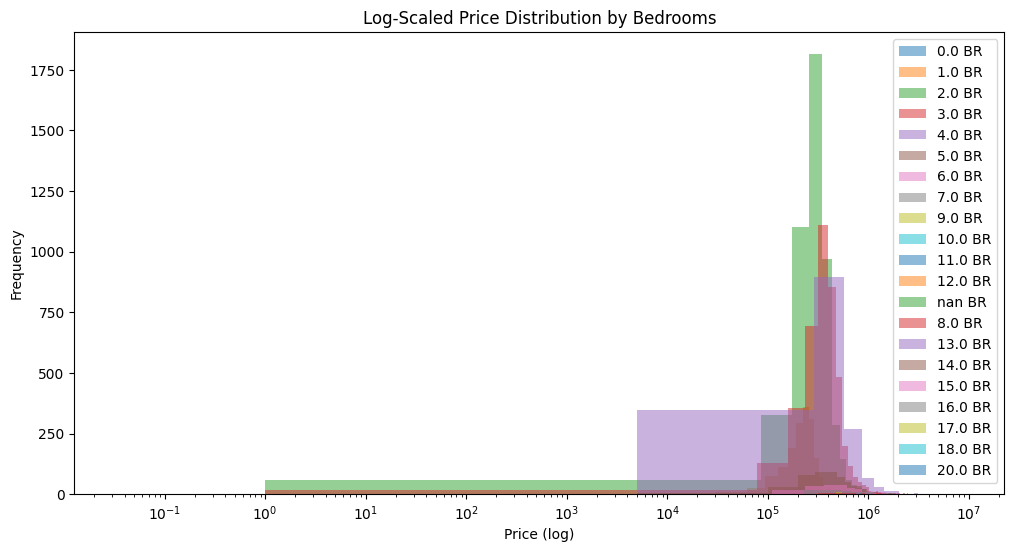

In [87]:
plt.figure(figsize=(12, 6))

for b in bedrooms:
    subset = df1[df1['Number of bedrooms'] == b]['Price']
    plt.hist(subset, bins=30, alpha=0.5, label=f"{b} BR")

plt.xscale("log")
plt.title("Log-Scaled Price Distribution by Bedrooms")
plt.xlabel("Price (log)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [84]:
df1.columns

Index(['url', 'Price', 'Number of bedrooms', 'Garage', 'Number of bathrooms',
       'Number of toilets', 'Elevator', 'Garden', 'Swimming pool', 'type',
       'postal_code', 'city', 'Region', 'province', 'price_per_sqm'],
      dtype='object')

## Split Dataset

Train / Validation / Test Split – <br>
Training set: Like practice problems → used to fit the model.<br>
Validation set: Like a mock test → used to tune hyperparameters and monitor overfitting.<br>
Test set: Like the final exam → never seen by the model; provides an unbiased evaluation of real-world performance.<br>

Doing this before preprocessing helps to avoid data leakage

In [ ]:
# Split the data into training, testing and  validation 

X = df1.drop('Price', axis=1)  # Features
y = df1['Price']               # Target

# Step 1: Split into training+validation and test (e.g., 80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split training+validation into training and validation (e.g., 75% train, 25% val of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Now:
# Training: 60% of original data
# Validation: 20%
# Test: 20%



## Preprocessing<br>

1. Imputation -  <br>
   These columns are numeric (Number of bedrooms, Number of bathrooms, Number of toilets), the best approach is Median imputation.<br>
   Median gives the central tendency without being affected by outliers.<br>
   Rescaling numeric features: Standardization  <br> 

2. one-hot encoding - <br>
   Converting categorical data into numeric features <br>

3. KNN to fill in binary columns  <br> 
   


In [ ]:
# 1. Imputation for numeric columns 

numeric_cols = ['Number of bedrooms','Number of bathrooms','Number of toilets','price_per_sqm']

from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='median')

# Fit only on training data
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])

# Transform val and test
X_val[numeric_cols] = numeric_imputer.transform(X_val[numeric_cols])
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])


# Check missing values 

X_train[numeric_cols].isnull().sum() 
X_val[numeric_cols].isnull().sum()
X_test[numeric_cols].isnull().sum()



Number of bedrooms     0
Number of bathrooms    0
Number of toilets      0
price_per_sqm          0
dtype: int64

In [ ]:
# 2. Standardization for numeric columns to have mean=0 and std=1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform validation and test sets
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


print(X_train[numeric_cols].mean(), X_train[numeric_cols].std())

# note: 4.521430e-18 means e-18 part is the exponent, meaning “times 10 to the power of -18.”

Number of bedrooms     4.521430e-18
Number of bathrooms    2.110001e-17
Number of toilets      1.657858e-17
price_per_sqm         -7.535717e-19
dtype: float64 Number of bedrooms     1.000053
Number of bathrooms    1.000053
Number of toilets      1.000053
price_per_sqm          1.000053
dtype: float64


In [ ]:
#  3 . KNN (k-Nearest Neighbors) - for binary columns

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

# Fit on training binary columns

X_train[binary_cols] = knn_imputer.fit_transform(X_train[binary_cols])

# Transform val and test
X_val[binary_cols] = knn_imputer.transform(X_val[binary_cols])
X_test[binary_cols] = knn_imputer.transform(X_test[binary_cols])
